# PEC 2: Estudio de técnicas de visualización de datos
## Correlation Matrix

El juego de datos escogido de Kaggle llamado **Heart Failure Prediction Dataset** está creado por el usuario *fedesoriano*. Contiene el archivo *heart.csv* con los datos. Es un dataset con 11 características clínicas para la predicción de eventos de enfermedades del corazón. Se puede encontrar en: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Make a subgroup of the necessary data
df_sub = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
df_sub.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [4]:
# Simple tabular correlation matrix
matrix = df_sub.corr()
matrix

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


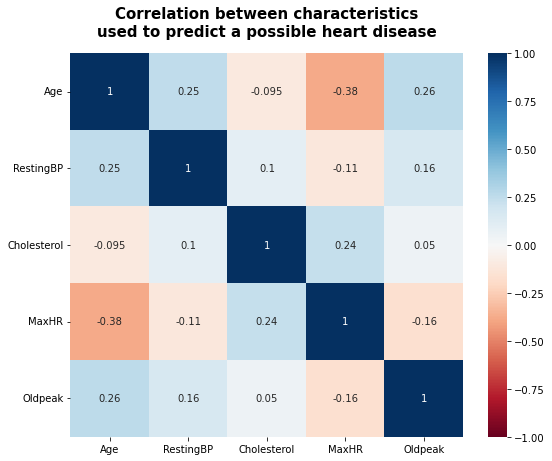

In [5]:
# Visualization: correlation matrix using heatmap
fig, ax = plt.subplots(figsize=(8, 6.5))
sns.heatmap(df_sub.corr(), annot=True, cmap = "RdBu", center=0,
            vmin=int(-1), vmax=int(1), annot_kws={"size":10}, ax=ax)
plt.setp(ax.get_yticklabels(), va="center", rotation=0)
plt.title('Correlation between characteristics\nused to predict a possible heart disease',
          fontsize=15, color='black', fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()